# Dimensionality Reduction

In [1]:
import pickle
import os

In [2]:
# load the data
data_filename = 'ondrejov-halpha-labeled-resampled.pickle'
with open(os.path.join('data', data_filename), 'rb') as f:
    spectra = pickle.load(f)

In [3]:
import numpy as np

In [4]:
ids_list = []
X_list = []
y_list = []
for spectrum, data in spectra.items():
    ids_list.append([spectrum])
    X_list.append(data['resampled_flux'])
    y_list.append([data['label']])
    
X = np.array(X_list)
ids = np.array(ids_list)
y = np.array(y_list)
ids.shape, X.shape, y.shape

((13208, 1), (13208, 3994), (13208, 1))

## PCA

In [5]:
import sklearn.decomposition
import matplotlib.pyplot as plt
%matplotlib inline

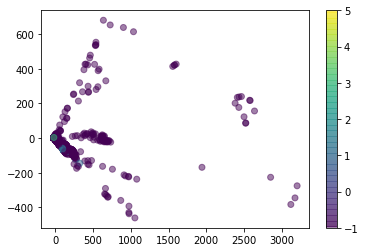

In [6]:
pca = sklearn.decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    alpha=0.5,
    c=y,
    #s=y + 1, # hide unlabeled set point size to -1 + 1 = 0
)
plt.colorbar()

In [7]:
import sklearn.preprocessing

In [8]:
X_scaled = sklearn.preprocessing.scale(X)

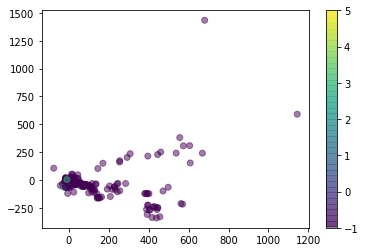

In [9]:
scaled_pca = sklearn.decomposition.PCA(n_components=2)
X_scaled_pca = pca.fit_transform(X_scaled)
plt.scatter(
    X_scaled_pca[:, 0],
    X_scaled_pca[:, 1],
    alpha=0.5,
    c=y,
)
plt.colorbar()

In [10]:
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)

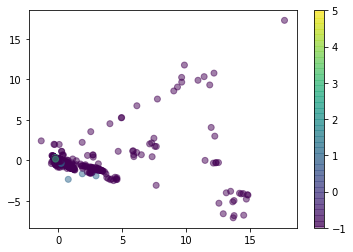

In [11]:
minmax_pca = sklearn.decomposition.PCA(n_components=2)
X_minmax_pca = pca.fit_transform(X_minmax)
plt.scatter(
    X_minmax_pca[:, 0],
    X_minmax_pca[:, 1],
    alpha=0.5,
    c=y,
)
plt.colorbar()

In [12]:
X_normalized = sklearn.preprocessing.normalize(X, norm='l1')

In [13]:
X_normalized.mean(axis=0), X_normalized.std(axis=0)

(array([ 0.00023009,  0.00022952,  0.00022897, ...,  0.00024611,
         0.00024606,  0.00024604]),
 array([  4.28257615e-05,   4.57936019e-05,   4.71933976e-05, ...,
          2.54692784e-05,   2.56084779e-05,   2.55661553e-05]))

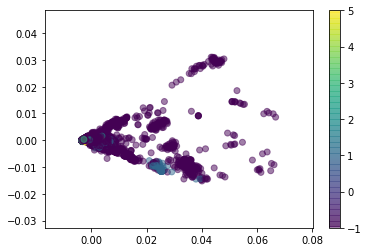

In [14]:
normalized_pca = sklearn.decomposition.PCA(n_components=2)
X_normalized_pca = pca.fit_transform(X_normalized)
plt.scatter(
    X_normalized_pca[:, 0],
    X_normalized_pca[:, 1],
    alpha=0.5,
    c=y
)
plt.colorbar()

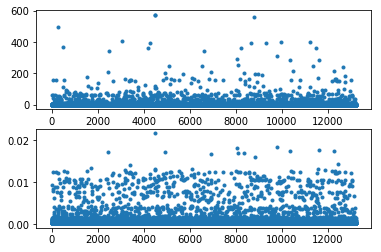

In [15]:
f, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(X.max(axis=1), '.')
ax2.plot(X_normalized.max(axis=1), '.')

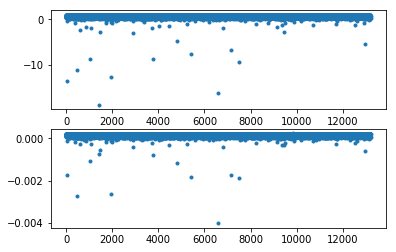

In [16]:
f, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(X.min(axis=1), '.')
ax2.plot(X_normalized.min(axis=1), '.')

In [17]:
import random

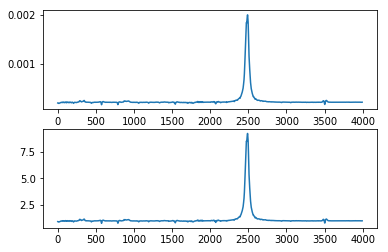

In [18]:
idx = random.randrange(X.shape[1])
f, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(X_normalized[idx])
ax2.plot(X[idx])